In [1]:
import librosa
import numpy as np

def load_and_normalize_audio(file_path, target_sample_rate=22050):
    # Load audio file with the target sample rate
    audio, _ = librosa.load(file_path, sr=target_sample_rate)

    # Normalize the audio to be between -1 and 1
    audio = audio / np.max(np.abs(audio))

    return audio

# Replace 'path/to/your/audio_file.wav' with the path to your WAV file
target_path = 'Results/audio/target.wav'
nn_path = 'Results/audio/nn.wav'
L1_path = 'Results/audio/L1.wav'
L2_path = 'Results/audio/L2.wav'
path_lst = [target_path, nn_path, L1_path, L2_path]
audio_lst = []
for path in path_lst:
    audio_lst.append(load_and_normalize_audio(path))


In [11]:
vals = [[0.4982    , 0.6428    , 0.536     , 0.5691    , 0.7512    ,
        0.8462    , 0.3006    , 0.09      , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.5       , 0.1448    ,
        0.1831    , 0.115     , 0.29875   , 0.25875   , 0.3       ,
        0.50116667, 0.5       , 0.0469    , 0.8258    , 0.2146    ,
        0.0385    , 0.22791667, 0.78783333, 0.64625   , 0.268     ,
        0.1014    , 0.5072    ],
       [0.24543284, 0.54836285, 0.55487508, 0.73969561, 0.56307453,
        0.68510777, 0.42720684, 0.24963474, 0.04252511, 0.02109584,
        0.5458433 , 0.02359399, 0.01455378, 0.55388618, 0.15827648,
        0.14510837, 0.3642804 , 0.32676876, 0.44685277, 0.37052497,
        0.54724616, 0.5103848 , 0.07981128, 0.88836026, 0.58665621,
        0.1837    , 0.552046  , 0.7751053 , 0.63060707, 0.23327287,
        0.17449322, 0.25993869],
       [0.2302234 , 0.63928878, 0.61458397, 0.72633088, 0.50985408,
        0.70781493, 0.50463897, 0.20520943, 0.02657081, 0.01274702,
        0.55212015, 0.02334266, 0.00778108, 0.51479608, 0.15093014,
        0.12598129, 0.38307923, 0.40474901, 0.43614608, 0.36348957,
        0.46278247, 0.52774262, 0.0525995 , 0.89187473, 0.67475784,
        0.20167048, 0.4858475 , 0.79438627, 0.69490469, 0.21330796,
        0.15124547, 0.31449199],
       [0.3420094 , 0.63352084, 0.53314263, 0.65764636, 0.44104588,
        0.58476955, 0.50230312, 0.19109893, 0.033819  , 0.02356696,
        0.59977353, 0.0313031 , 0.01528487, 0.48610741, 0.13692032,
        0.15570721, 0.49430704, 0.39946711, 0.43669388, 0.38193458,
        0.5401575 , 0.5831576 , 0.08604576, 0.79017055, 0.57160097,
        0.22483245, 0.53953487, 0.79167265, 0.70956755, 0.26627368,
        0.14904355, 0.27341995]]

In [31]:
import matplotlib.pyplot as plt
from PIL import Image


sr = 22050
hop_length = 224
fft_size = 2048
n_mels = 224
image_lst = []

# Plot Mel-spectrogram
for idx, audio_data in enumerate(audio_lst):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=fft_size, hop_length=hop_length, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(mel_spectrogram_db, aspect='auto')
    plt.axis('off')

    image_file_path = f'figures/Ableton-test/combined_image{idx}.pdf'
    plt.savefig(image_file_path, bbox_inches='tight', pad_inches=0)

    # Close the figure to release memory
    plt.close(fig)

In [24]:
len(image_lst)

4

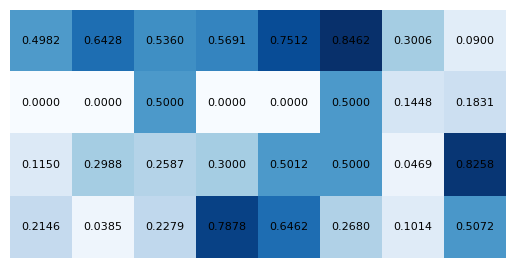

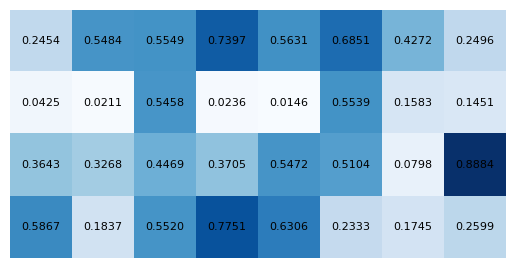

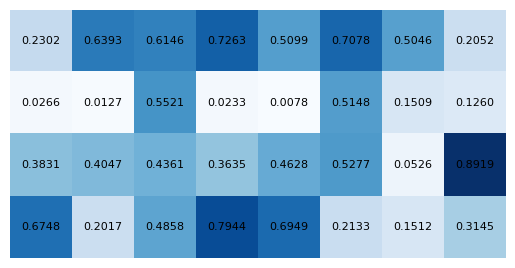

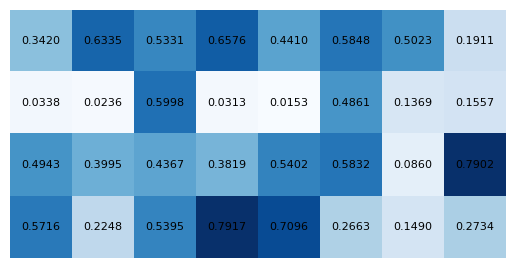

In [28]:
param_lst = np.array(vals)
# image_lst has 4 images that comes from image.resize((image_size, image_size))

for idx in range(param_lst.shape[0]):
    array = param_lst[idx, :].reshape(4, 8)
    fig, ax = plt.subplots()
    ax.imshow(array, cmap='Blues', interpolation='nearest')

    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            ax.text(j, i, f"{array[i, j]:.4f}", ha="center", va="center", color="k", fontsize=8)

    plt.axis('off')

    # Save the array image to a file
    array_image_file_path = f'figures/Ableton-test/array_image{idx}.pdf'
    plt.savefig(array_image_file_path, bbox_inches='tight', pad_inches=0)

    # array_image = Image.open(array_image_file_path)

    # # Calculate the new size for the combined image
    # new_width = max(image_lst[idx].width, array_image.width)
    # new_height = image_lst[idx].height + array_image.height

    # # Create a blank image with the new size
    # combined_image = Image.new('RGB', (new_width, new_height))

    # # Paste the original image at the top
    # combined_image.paste(image_lst[idx], (0, 0))

    # # Paste the array image at the bottom, aligning the bottoms of the images
    # combined_image.paste(array_image, (0, image_lst[idx].height))

    # # Save the combined image as an EPS file
    # combined_image_file_path = f'figures/Ableton-test/combined_image{idx}.eps'
    # combined_image.save(combined_image_file_path, format='EPS')

    # # Display the combined image
    # combined_image.show()

